In [ ]:
SSimport pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('/content/Mobile proce prediction update - mobile_prices_2023.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"6,999",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1831,"Infinix Note 7 (Forest Green, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"14,999",2023-06-17
1832,"Infinix Note 7 (Bolivia Blue, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"14,999",2023-06-17
1833,"Infinix Note 7 (Aether Black, 64 GB)",4.3,"25,582",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"14,999",2023-06-17
1834,"Infinix Zero 8i (Silver Diamond, 128 GB)",4.2,"7,117",8 GB RAM,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"18,999",2023-06-17


In [ ]:
# Display the first few rows of the dataset
print(data.head())

# Get an overview of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())


                      Phone Name  Rating ?/5 Number of Ratings       RAM  \
0   POCO C50 (Royal Blue, 32 GB)         4.2            33,561  2 GB RAM   
1  POCO M4 5G (Cool Blue, 64 GB)         4.2            77,128  4 GB RAM   
2   POCO C51 (Royal Blue, 64 GB)         4.3            15,175  4 GB RAM   
3    POCO C55 (Cool Blue, 64 GB)         4.2            22,621  4 GB RAM   
4  POCO C51 (Power Black, 64 GB)         4.3            15,175  4 GB RAM   

  ROM/Storage       Back/Rare Camera      Front Camera   Battery  \
0   32 GB ROM        8MP Dual Camera  5MP Front Camera  5000 mAh   
1   64 GB ROM             50MP + 2MP  8MP Front Camera  5000 mAh   
2   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   
3   64 GB ROM  50MP Dual Rear Camera  5MP Front Camera  5000 mAh   
4   64 GB ROM   8MP Dual Rear Camera  5MP Front Camera  5000 mAh   

                                           Processor   Price Date of Scraping  
0  Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...  

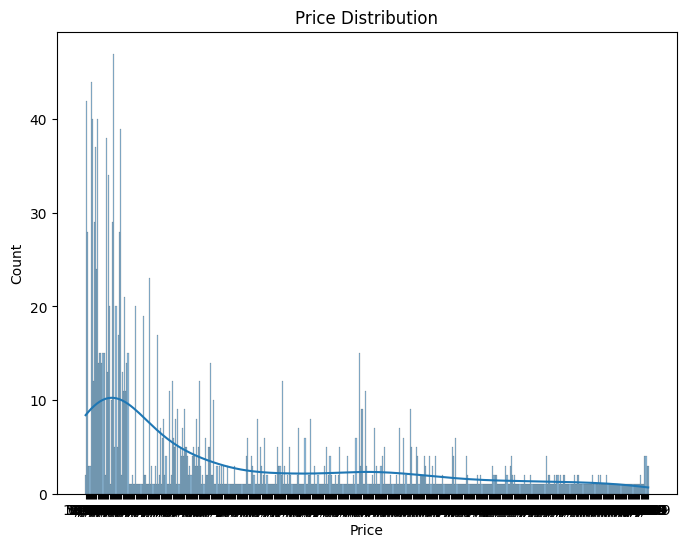

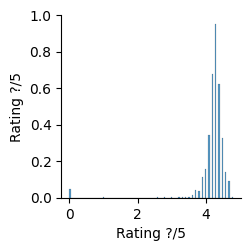

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of Price
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], bins=20, kde=True)
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()

# Example: Pairplot to explore relationships between numerical features
sns.pairplot(data[['Price', 'Rating ?/5', 'RAM', 'ROM/Storage']])
plt.show()


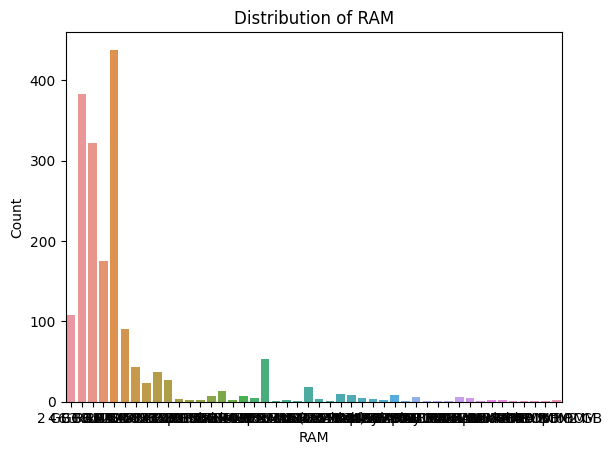

In [ ]:
# Example: Countplot for 'RAM'
sns.countplot(x='RAM', data=data)
plt.xlabel('RAM')
plt.ylabel('Count')
plt.title('Distribution of RAM')
plt.show()


In [ ]:
data['Price'] = data['Price'].str.replace(',', '').astype(float)
label_encoders = {}
categorical_columns = ['RAM', 'ROM/Storage', 'Back/Rare Camera', 'Battery', 'Processor', 'Date of Scraping', 'Front Camera']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le



In [ ]:
X = data.drop(['Price', 'Phone Name', 'Number of Ratings'], axis=1)

y = data['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

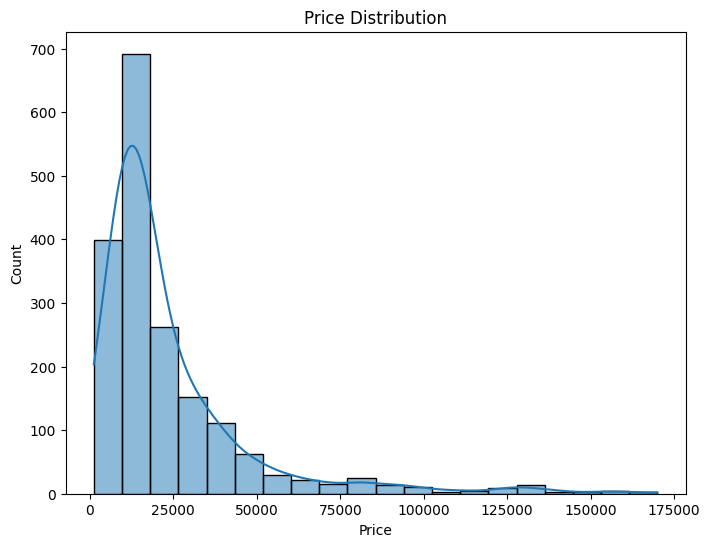

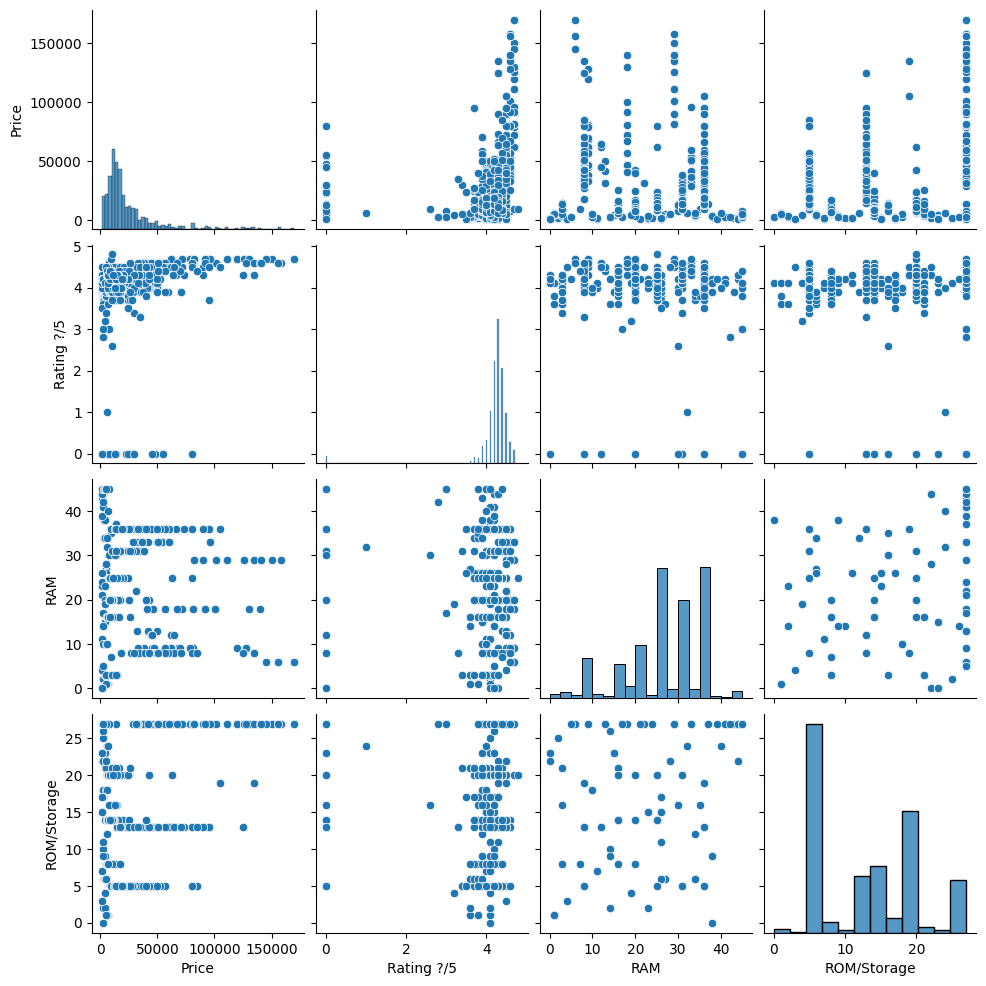

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of Price
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], bins=20, kde=True)
plt.xlabel('Price')
plt.title('Price Distribution')
plt.show()

# Example: Pairplot to explore relationships between numerical features
sns.pairplot(data[['Price', 'Rating ?/5', 'RAM', 'ROM/Storage']])
plt.show()


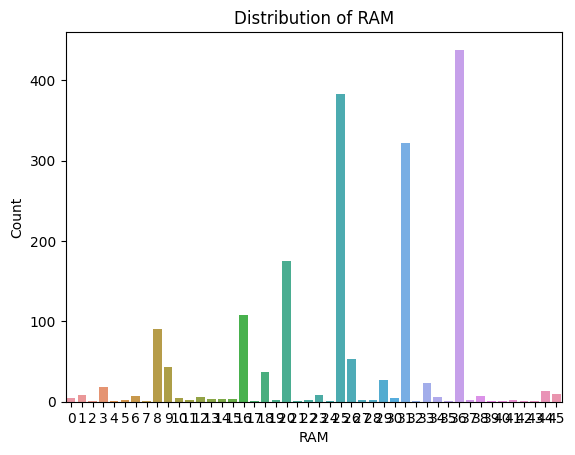

In [ ]:
# Example: Countplot for 'RAM'
sns.countplot(x='RAM', data=data)
plt.xlabel('RAM')
plt.ylabel('Count')
plt.title('Distribution of RAM')
plt.show()


<ipython-input-17-15a7282aa256>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


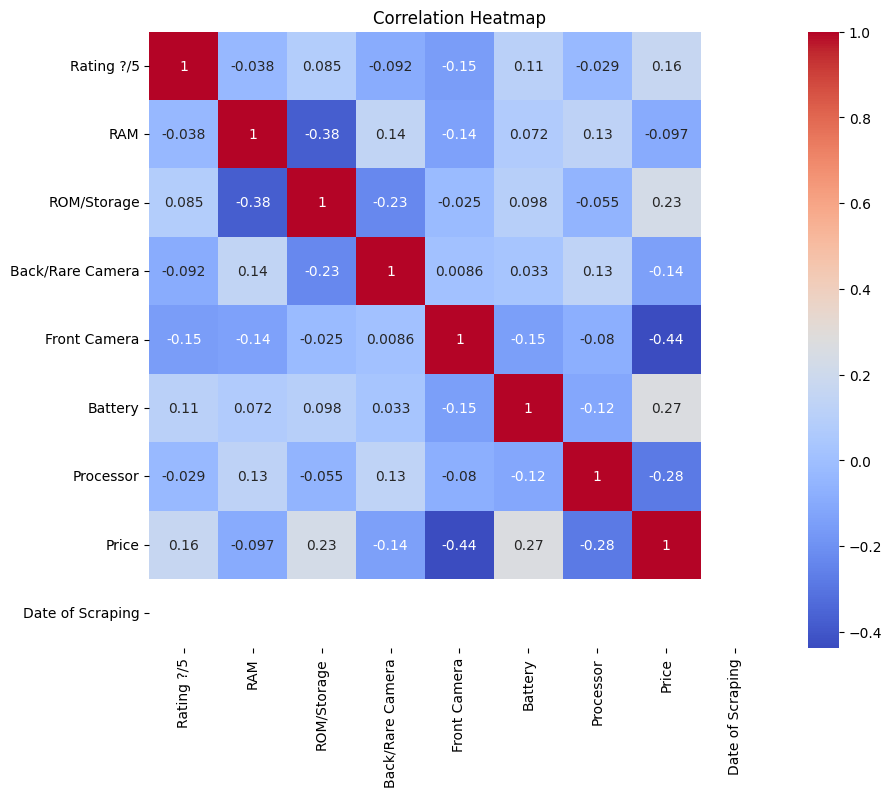

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


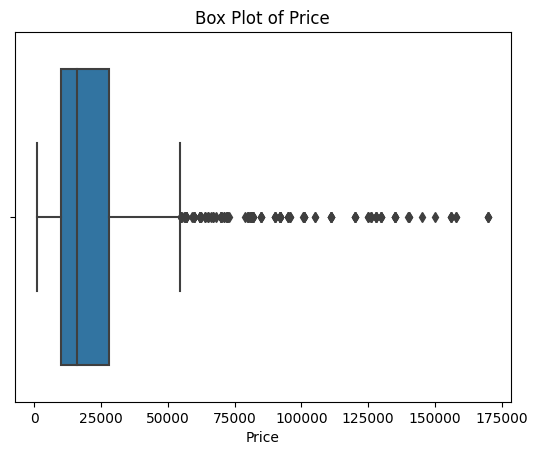

In [ ]:
# Example: Box plot to visualize outliers in 'Price'
sns.boxplot(x=data['Price'])
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

# Example: Using z-scores to detect and remove outliers in 'Price'
from scipy import stats
z_scores = stats.zscore(data['Price'])
data_no_outliers = data[(z_scores < 3)]

# Handle outliers in a way that's appropriate for your analysis or model (e.g., remove them or transform them).


In [ ]:
model = RandomForestRegressor(n_estimators=300, random_state=55)
model.fit(X_train_poly, y_train)

RandomForestRegressor(n_estimators=300, random_state=55)

In [ ]:
y_pred = model.predict(X_test_poly)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 6147.870703121301


In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)
print(f"Model Accuracy (R-squared): {r_squared}")

Model Accuracy (R-squared): 0.9475626958620494


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Initialize a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, random_state=55)

# Train the model on the training data
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)

# Calculate R-squared (R2) score
r_squared = r2_score(y_test, y_pred)

print(f"Model Accuracy (R-squared): {r_squared}")


Model Accuracy (R-squared): 0.9396923310240594


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score
# Create a confusion matrix


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForestClassifier (or any other classifier of your choice)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' F1 score accounts for class imbalance
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
F1 Score: 0.48


In [ ]:
min_price = float(input("Enter minimum price: "))
max_price = float(input("Enter maximum price: "))

filtered_data = data[(data['Price'] >= min_price) & (data['Price'] <= max_price)]

if not filtered_data.empty:
    filtered_data_poly = poly.transform(filtered_data.drop(['Price', 'Phone Name', 'Number of Ratings'], axis=1))
    filtered_data_poly = scaler.transform(filtered_data_poly)

    predicted_mobiles = model.predict(filtered_data_poly)
    result_df = pd.DataFrame({'Phone Name': filtered_data['Phone Name'], 'Price': filtered_data['Price'], 'Rating ?/5': filtered_data['Rating ?/5'], 'Predicted_Price': predicted_mobiles})
    result_df = result_df.sort_values(by=['Rating ?/5', 'Predicted_Price'], ascending=[False, True])
    print(result_df)
else:
    print("No phones available in the specified price range.")


Enter minimum price: 10000
Enter maximum price: 20000
                                    Phone Name    Price  Rating ?/5  \
265         realme C25_Y (Glacier Blue, 64 GB)  10999.0         4.5   
267           realme C25_Y (Metal Grey, 64 GB)  10999.0         4.5   
977            vivo T1X (Gravity Black, 64 GB)  16990.0         4.5   
978               vivo T1X (Space Blue, 64 GB)  16990.0         4.5   
151        realme 9i 5G (Rocking Black, 64 GB)  14999.0         4.5   
...                                        ...      ...         ...   
1424              Nokia G11 Plus (Blue, 64 GB)  13999.0         3.7   
1427              Nokia G11 Plus (Grey, 64 GB)  13999.0         3.7   
1669         Alcatel Idol 4 (Dark Grey, 16 GB)  16999.0         3.7   
1691               Alcatel Scribe (Blue, 4 GB)  12900.0         0.0   
606   SAMSUNG Galaxy M04 (Light Green, 128 GB)  13499.0         0.0   

      Predicted_Price  
265      11173.783977  
267      11173.783977  
977      12417.865498